In [1]:
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

In [2]:
pubassist = gpd.read_file('publicassisacs2019_5yr_B19057_14000US06037534001.geojson')

In [3]:
pubassist.head()

geoid                                   name  B19057001  \
0        05000US06037                 Los Angeles County, CA  3316795.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1575.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1312.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2297.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1357.0   

   B19057001, Error  B19057002  B19057002, Error  B19057003  B19057003, Error  \
0            5782.0   112441.0            2009.0  3204354.0            5958.0   
1              90.0       95.0              46.0     1480.0              96.0   
2              63.0       17.0              22.0     1295.0              67.0   
3              98.0      147.0              75.0     2150.0             131.0   
4              57.0       57.0              41.0     1300.0              69.0   

                                            geometry  
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...

In [3]:
pubassist = pubassist.drop ([0])

In [4]:
columns_to_keep = ['geoid', 
                   'name',
                   'B19057001',
                   'B19057002',
                   'B19057003',
                   'geometry']

In [5]:
pubassist = pubassist[columns_to_keep]

In [6]:
pubassist.columns= ['geoid', 
                   'name',
                    'Total',
                    'With public assistance income',
                    'No public assistance income',
                    'geometry']

In [8]:
pubassist.head ()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1575.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1312.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2297.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1357.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  1445.0   

   With public assistance income  No public assistance income  \
1                           95.0                       1480.0   
2                           17.0                       1295.0   
3                          147.0                       2150.0   
4                           57.0                       1300.0   
5                           10.0                       1435.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

In [7]:
pubassist['Percent With public assistance income'] = pubassist['With public assistance income']/pubassist['Total']*100
pubassist['Percent No public assistance income'] = pubassist['No public assistance income']/pubassist['Total']*100

In [10]:
pubassist.head ()

geoid                                   name   Total  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1575.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1312.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2297.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1357.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA  1445.0   

   With public assistance income  No public assistance income  \
1                           95.0                       1480.0   
2                           17.0                       1295.0   
3                          147.0                       2150.0   
4                           57.0                       1300.0   
5                           10.0                       1435.0   

                                            geometry  \
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...   
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...   

   Percent With public assistance income  Percent No public assistance income  
1                               6.031746                            93.968254  
2                               1.295732                            98.704268  
3                               6.399652                            93.600348  
4                               4.200442                            95.799558  
5                               0.692042                            99.307958

In [8]:
pubassist_web_mercator = pubassist.to_crs(epsg=3857)

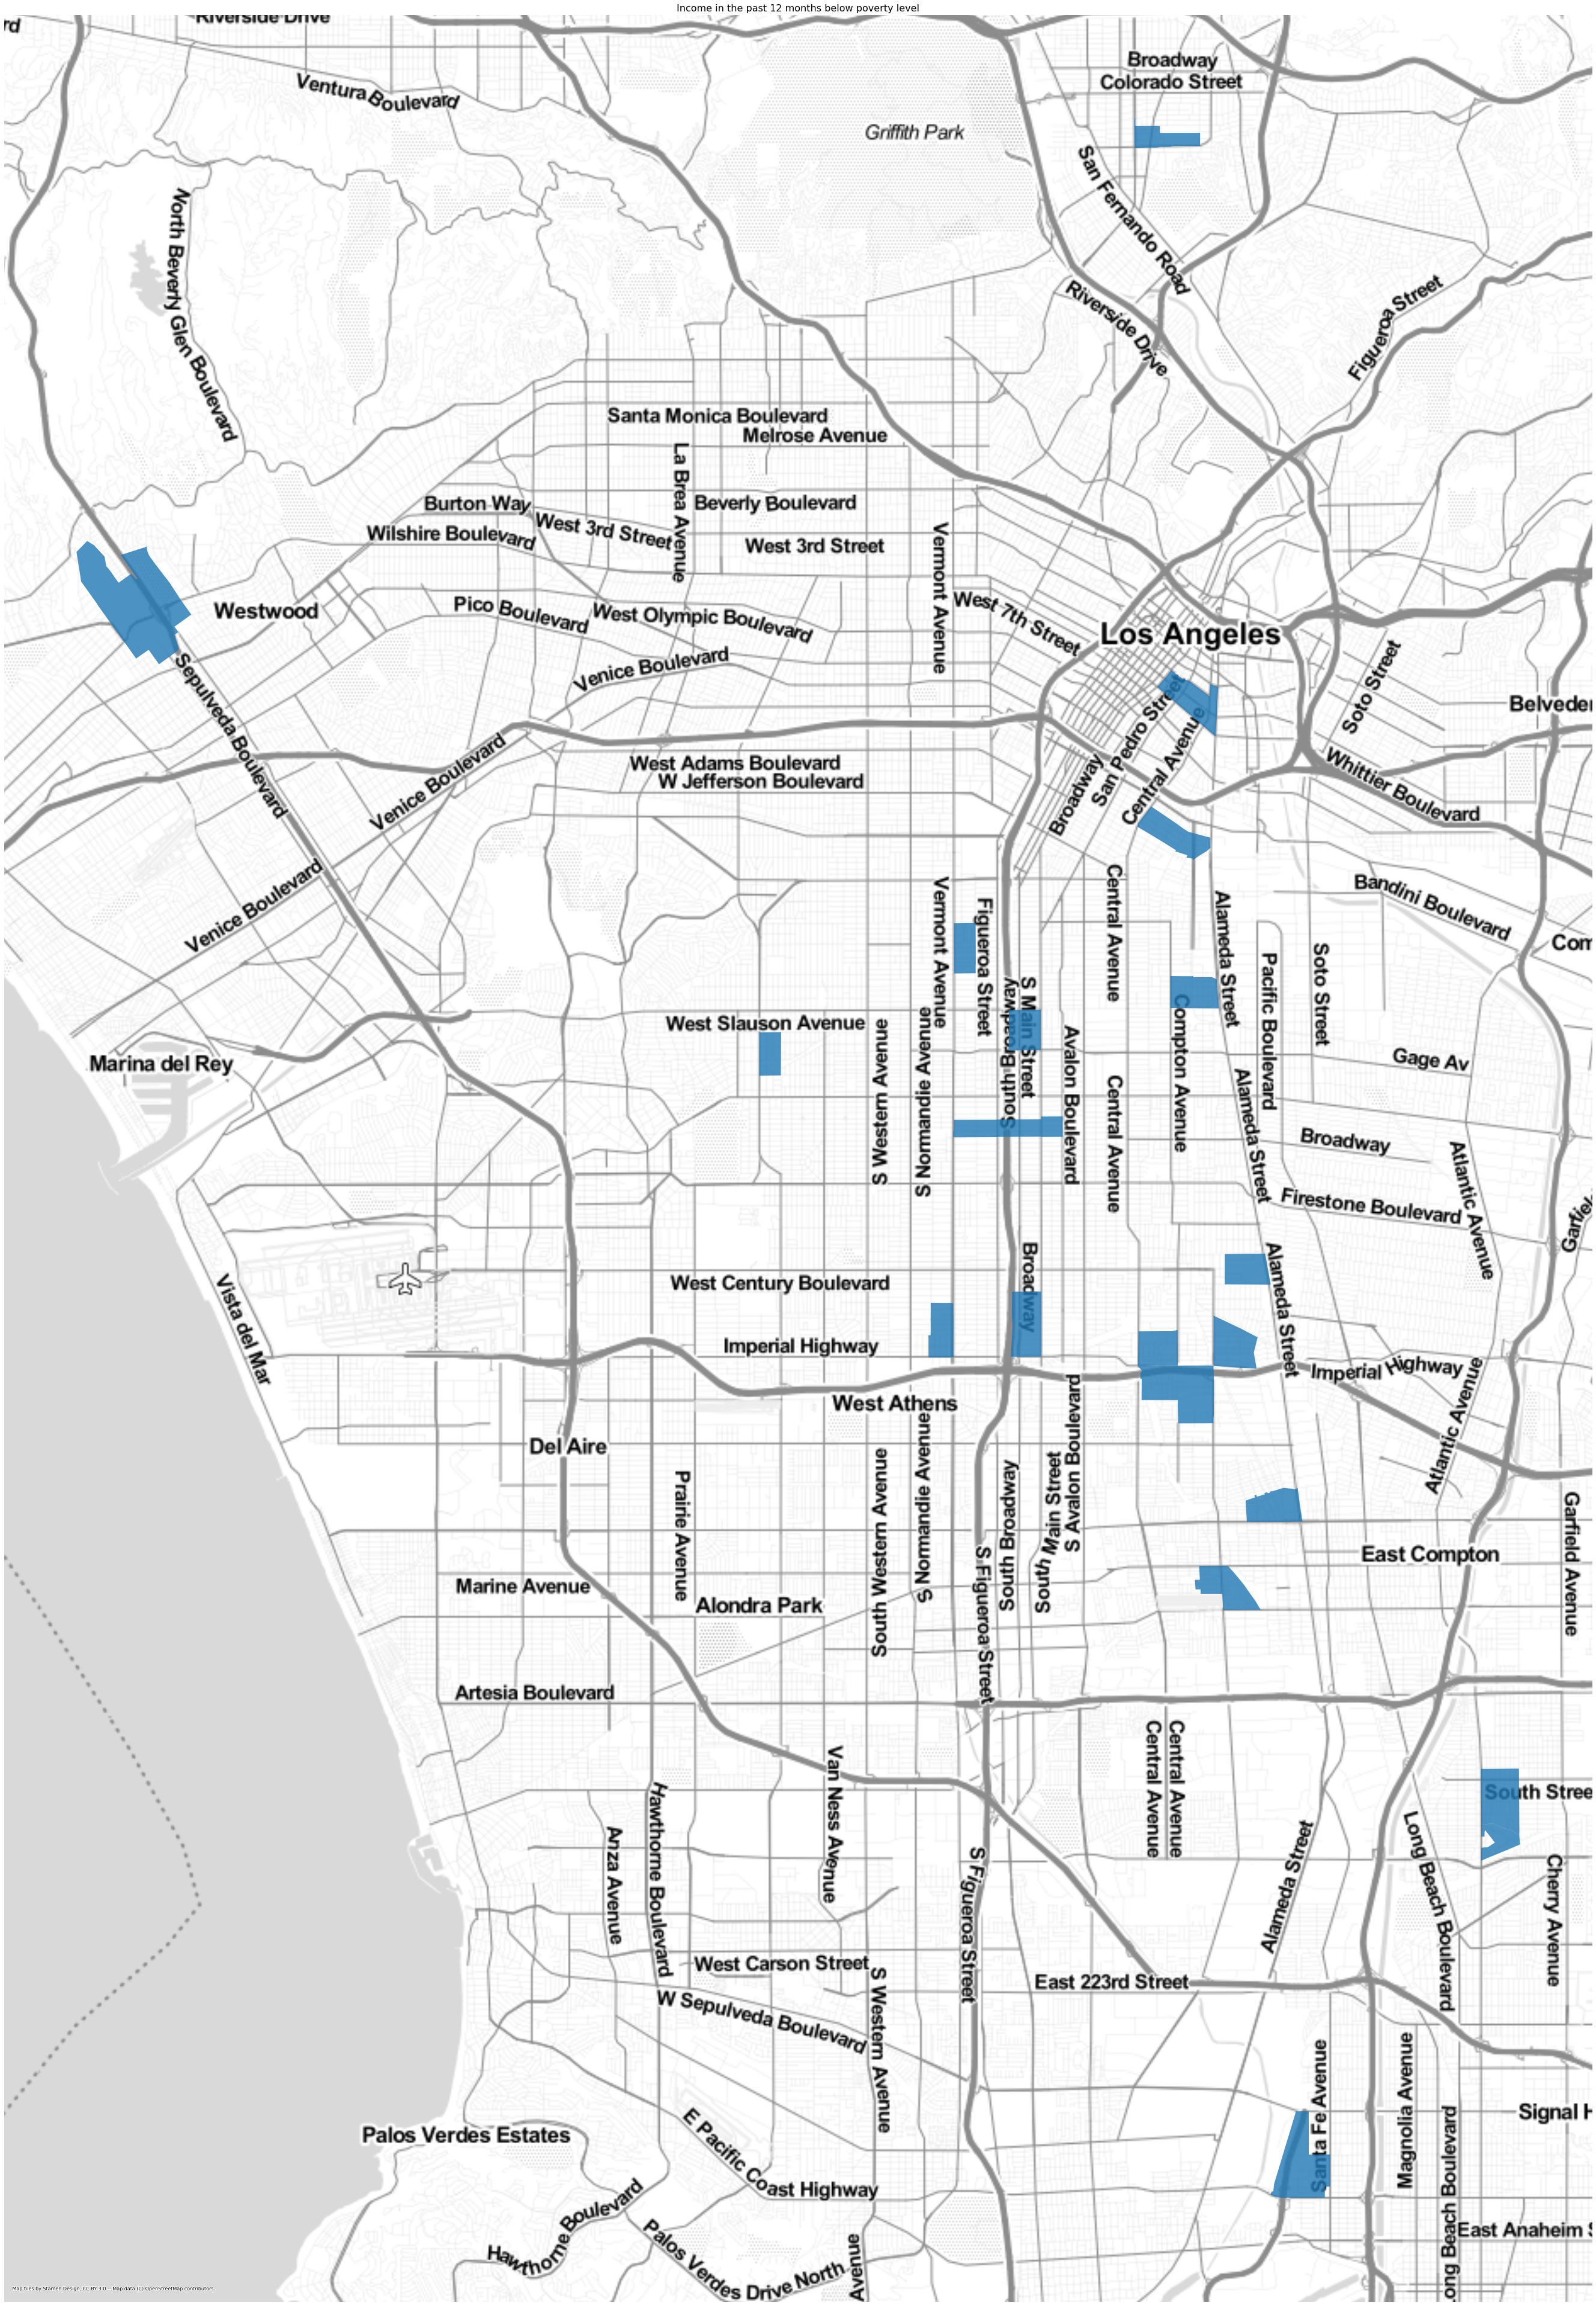

In [9]:
fig, ax = plt.subplots(figsize=(70, 70))

pubassist_web_mercator[pubassist_web_mercator['Percent With public assistance income']> 15].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Income in the past 12 months below poverty level',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [10]:
pubassist_sorted = pubassist.sort_values(by='Percent With public assistance income',ascending = False)

In [16]:
pubassist_sorted.head ()

geoid                                name   Total  \
537   14000US06037206300  Census Tract 2063, Los Angeles, CA  2433.0   
2119  14000US06037701100  Census Tract 7011, Los Angeles, CA    48.0   
821   14000US06037242600  Census Tract 2426, Los Angeles, CA  1381.0   
818   14000US06037242100  Census Tract 2421, Los Angeles, CA   751.0   
824   14000US06037243100  Census Tract 2431, Los Angeles, CA  1530.0   

      With public assistance income  No public assistance income  \
537                           639.0                       1794.0   
2119                           12.0                         36.0   
821                           341.0                       1040.0   
818                           183.0                        568.0   
824                           363.0                       1167.0   

                                               geometry  \
537   MULTIPOLYGON (((-118.25041 34.04326, -118.2490...   
2119  MULTIPOLYGON (((-118.46889 34.06587, -118.4687...   
821   MULTIPOLYGON (((-118.25425 33.93097, -118.2542...   
818   MULTIPOLYGON (((-118.23675 33.94491, -118.2367...   
824   MULTIPOLYGON (((-118.23904 33.93027, -118.2390...   

      Percent With public assistance income  \
537                               26.263872   
2119                              25.000000   
821                               24.692252   
818                               24.367510   
824                               23.725490   

      Percent No public assistance income  
537                             73.736128  
2119                            75.000000  
821                             75.307748  
818                             75.632490  
824                             76.274510